In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
norm_train_data, norm_test_data = train_data / 255.0, test_data / 255.0

In [ ]:
base = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu')
])

In [ ]:
head = models.Sequential([
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10)
])

In [ ]:
model = models.Sequential([
  base,
  head
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(norm_train_data, train_labels, epochs=10,
                    validation_data=(norm_test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.7535 - accuracy: 0.3495 - val_loss: 1.2326 - val_accuracy: 0.5595
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1876 - accuracy: 0.5789 - val_loss: 1.0944 - val_accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0291 - accuracy: 0.6384 - val_loss: 1.0094 - val_accuracy: 0.6387
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9284 - accuracy: 0.6721 - val_loss: 0.9895 - val_accuracy: 0.6500
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8467 - accuracy: 0.7009 - val_loss: 0.8962 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7922 - accuracy: 0.7212 - val_loss: 0.8704 - val_accuracy: 0.6993
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7353 - accuracy: 0.7408 - val_loss: 0.8694 -

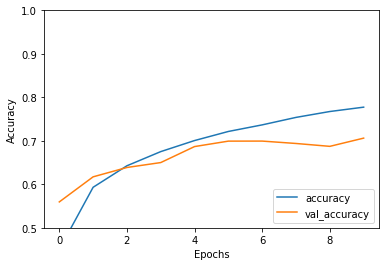

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(norm_test_data, test_labels, verbose=2)
print(f"The test loss is: {test_loss}")
print(f"The test accuracy is: {test_accuracy}")

313/313 - 4s - loss: 0.8622 - accuracy: 0.7062
The test loss is: 0.8621551990509033
The test accuracy is: 0.7062000036239624


In [ ]:
model.save("cnn.hd5")

INFO:tensorflow:Assets written to: cnn.hd5/assets


In [ ]:
from google.colab import files
files.download("cnn.hd5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>